<a href="https://colab.research.google.com/github/Vey27/Applied-Data-Science/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Use Case: Feature Selection in Cancer Dataset Using FA**
**Problem Statement**
John Cancer Hospital (JCH) is a leading cancer hospital in the USA. It specializes in preventing breast cancer.
Over the last few years, JCH has collected breast cancer data from patients who came for screening or treatment.
However, this data has 32 attributes and is difficult to run and interpret the result. As an ML expert,
you have to reduce the number of attributes so that the results are meaningful and accurate.
Use FA for feature selection.<br><br>
**Dataset**
Features of the dataset are computed from a digitized image of a Fine-Needle Aspirate (FNA) of a breast mass.
They describe the characteristics of the cell nuclei present in the image.

**Please note:**
This is Feature Engineer practice the factor covariance matrix alone cannot determine if breast cancer is positive or not. To make a determination, it is necessary to consider various factors such as diagnostic tests, medical history, and other relevant information specifically related to breast cancer. Therefore, relying solely on the factor covariance matrix is not sufficient in determining the presence or absence of breast cancer.

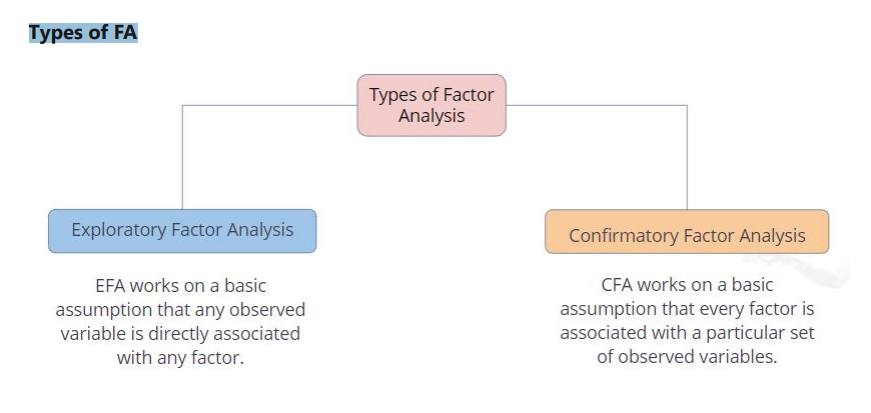

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Import label encoder
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [105]:
df.shape


(569, 32)

- df.shape will show the number of rows and columns in the dataframe.


In [106]:
# Check the data , there should be no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [107]:
# defining the array as np.array
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
'mean smoothness' 'mean compactness' 'mean concavity'
'mean concave points' 'mean symmetry' 'mean fractal dimension'
'radius error' 'texture error' 'perimeter error' 'area error'
'smoothness error' 'compactness error' 'concavity error'
'concave points error' 'symmetry error' 'fractal dimension error'
'worst radius' 'worst texture' 'worst perimeter' 'worst area'
'worst smoothness' 'worst compactness' 'worst concavity'
'worst concave points' 'worst symmetry' 'worst fractal dimension'])


In [108]:
#### Convert diagnosis column to 1/0 and store in new column target
from sklearn.preprocessing import LabelEncoder

In [109]:
#Converting diagnosis to numerical variable in df
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

- In the above code, we are encoding the column diagnosis in which we are encoding M as 1 and B as 0.


# Factor Analysis

### Bartlett's Test
- Bartlett's test of sphericity examines the intercorrelation of observed variables by comparing the observed correlation matrix to the identity matrix. If the test is statistically insignificant, factor analysis should not be used.


In [110]:
!pip install factor_analyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(40196.16116300974, 0.0)

- In the given output, the chi-square value is 40196.16116300974, which is a measure of the discrepancy between the observed correlation matrix and the identity matrix. A larger chi-square value indicates a greater discrepancy.

- The p-value is 0.0, which suggests that the test result is statistically significant. the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an
identity matrix.

### Kaiser-Meyer-Olkin Test
- It assesses the suitability of each observed variable as well as the entire model

In [112]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)


In [113]:
kmo_model


0.2606290621756068

- The KMO value ranges from 0 to 1, where values closer to 1 indicate a better suitability of the data for factor analysis. In this case, the KMO value of 0.2606290621756068 suggests that the variables in the dataset have a weak correlation and may not be suitable for factor analysis.

In [114]:
df.head(2)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Finding Significant Variables


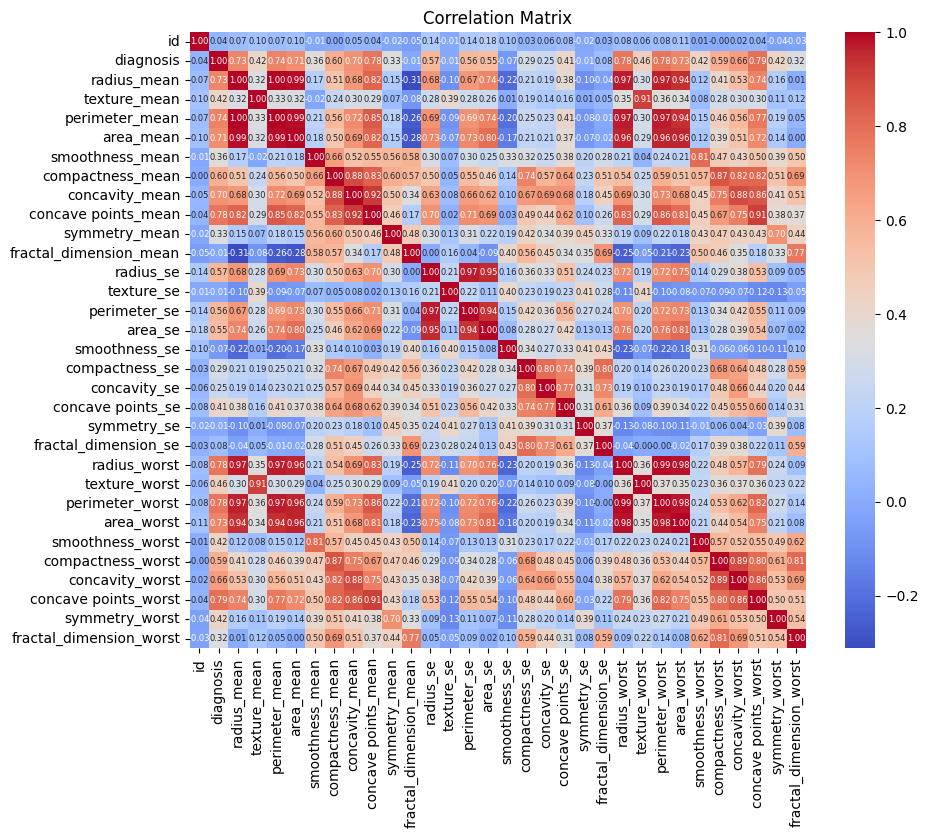

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True, annot_kws={"size": 6})
plt.title("Correlation Matrix")
plt.show()


In [116]:
df_corr = df[['radius_mean','perimeter_mean', 'area_mean','radius_worst','perimeter_worst',
 'area_worst','concavity_mean','concave points_mean', 'concavity_worst',
 'concave points_worst','diagnosis']]


###Running KMO Test


In [117]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_corr)
kmo_model

0.8260787423549099

- The KMO value of 0.8260787423549099 suggests that the variables in the dataset have a relatively high degree of correlation and are suitable for factor analysis. A KMO value above 0.6 is generally considered acceptable, and a value above 0.8 is often considered excellent for factor analysis.

###Factor Analysis

In [118]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_corr,11)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [119]:
ev, v = fa.get_eigenvalues()
ev

array([9.09178108e+00, 1.15744917e+00, 3.30050451e-01, 1.75328755e-01,
       1.20114615e-01, 8.46813558e-02, 2.04348144e-02, 1.33778025e-02,
       4.91643818e-03, 1.55811996e-03, 3.07397281e-04])

- The eigenvalues are provided in descending order, meaning the first eigenvalue (9.09178108e+00) explains the most variance, followed by the second eigenvalue (1.15744917e+00), and so on.

-  Eigenvalues indicate the amount of variance explained by each factor extracted from the data, and they help determine the number of factors to retain for further analysis.

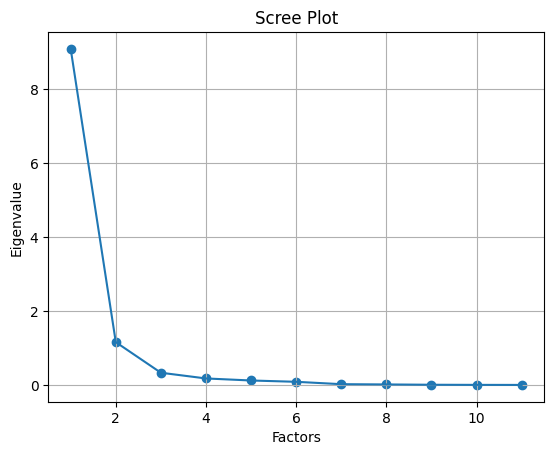

In [120]:
plt.scatter(range(1,df_corr.shape[1]+1),ev)
plt.plot(range(1,df_corr.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

- Inference:<br>
Based on the eigenvalues and screen plot analysis, conclude that there are only two factors (or unobserved variables) that should be retained for further analysis. This decision is supported by the fact that there are only two eigenvalues above 1 and only two values after the elbow point on the scree plot.

In [121]:
fa1 = FactorAnalyzer(rotation="varimax", n_factors=2)
fa1.fit(df, 2)


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [122]:
fa1.loadings_


array([[ 0.09949822, -0.0175289 ],
       [ 0.76990048,  0.2623415 ],
       [ 0.97577564, -0.05180551],
       [ 0.37374525,  0.08592885],
       [ 0.97834607,  0.00385959],
       [ 0.97757833, -0.04299327],
       [ 0.21011043,  0.61739298],
       [ 0.54025265,  0.78340654],
       [ 0.71664402,  0.63252344],
       [ 0.84801319,  0.44148548],
       [ 0.19103234,  0.61468441],
       [-0.26532101,  0.86590234],
       [ 0.7431245 ,  0.18542383],
       [-0.04891221,  0.18458444],
       [ 0.7388625 ,  0.2275271 ],
       [ 0.79163253,  0.08879413],
       [-0.18452396,  0.38701833],
       [ 0.22456327,  0.78529352],
       [ 0.2181755 ,  0.66739594],
       [ 0.3904135 ,  0.59545102],
       [-0.08217263,  0.40098443],
       [-0.03298699,  0.73180421],
       [ 0.98993515, -0.00563542],
       [ 0.36256059,  0.11401422],
       [ 0.99041424,  0.05315552],
       [ 0.97481138, -0.01017728],
       [ 0.18911152,  0.5607166 ],
       [ 0.46178052,  0.6952383 ],
       [ 0.5755513 ,

###loglikelihood


In [123]:
# CFA stands for Confirmatory Factor Analysis.This line imports CFA function 
# from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser) 
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser) 


In [124]:
model_dict = {"F1": ['radius_mean','perimeter_mean', 'area_mean','radius_worst',
 'perimeter_worst','diagnosis'], "F2": ['area_worst','concavity_mean',
 'concave points_mean', 'concavity_worst','concave points_worst']}


In [125]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_corr,model_dict)
# df_corr:Pandas DataFrame and model_dict: dictionary with factors


In [126]:
# Performs confirmatory factor analysis
cfa1 = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa1.fit(df_corr.values)


ConfirmatoryFactorAnalyzer(disp=False, n_obs=569,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x7fc96253ad10>)

In [127]:
# cfa1.loadings_ will gave you the factor loading matrix
# The factor loading is a matrix which shows the relationship of each variable to the underlying factor.
# It shows the correlation coefficient for observed variable and factor.
# It shows the variance explained by the observed variables.
cfa1.loadings_


array([[-1.09960498e+00,  0.00000000e+00],
       [ 2.46104835e+01,  0.00000000e+00],
       [ 3.12261192e+02,  0.00000000e+00],
       [ 4.32942427e+00,  0.00000000e+00],
       [ 2.75946634e+01,  0.00000000e+00],
       [ 5.27053680e+02,  0.00000000e+00],
       [ 0.00000000e+00,  4.91862755e+00],
       [ 0.00000000e+00,  5.94583249e+00],
       [ 0.00000000e+00,  7.82716434e+00],
       [ 0.00000000e+00,  5.00627908e+00],
       [ 0.00000000e+00,  3.29396628e-01]])

- The first row [-1.09960498e+00, 0.00000000e+00] corresponds to the first observed variable and its loadings on the two latent factors. The first observed variable has a loading of approximately -1.0996 on the first latent factor and a loading of 0 on the second latent factor.

In [128]:
#This will give you the factor covariance matrix and the type of this will be numpy array
cfa1.factor_varcovs_

array([[1.        , 0.04888012],
       [0.04888012, 1.        ]])

- The diagonal elements represent the variances of the latent factors. In this case, both latent factors have a variance of approximately 1. This indicates that the factors have significant variability or dispersion.
- The off-diagonal element (0.04888012) represents the covariance between the two latent factors. It suggests a weak positive relationship between the factors.
- In this case, the factors have relatively high variances and a weak positive relationship.

In [129]:
cfa1.transform(df_corr.values)


array([[ 2.00527758e+00,  2.50708253e-02],
       [ 2.05382931e+00,  5.72441936e-04],
       [ 1.59872067e+00,  1.41637354e-02],
       ...,
       [ 4.91402596e-01,  3.02521287e-03],
       [ 1.81441438e+00,  3.40670880e-02],
       [-1.21848093e+00, -1.40660991e-02]])

### Interpreting the output:

- The first column represents the scores for the first latent factor.
- The second column represents the scores for the second latent factor.

By identifying and understanding the breast cancer latent factor(s), gain insights into the underlying structure of the disease, improve diagnostic models, and inform treatment approaches.

The provided latent factor results indicate that when an observation has a high score on a specific latent factor, such as a score of 2.00527758 on the first latent factor or 0.0250708253 on the second latent factor, it suggests a strong positive association between that observation and the underlying construct represented by the respective factor. These high scores indicate a higher presence or influence of the corresponding latent factors in the observed variables associated with those observations.

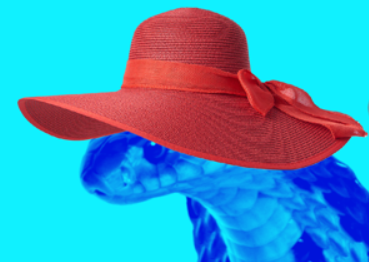